# The Spark Foundation Internship Task 

## Predict Student Mark

### Importing Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

In [3]:
df = pd.read_csv('student_scores - student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.shape

(25, 2)

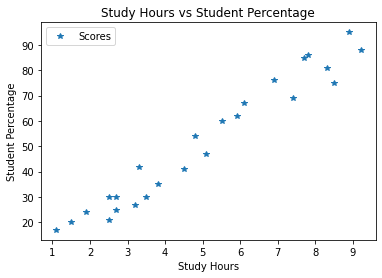

In [9]:
df.plot(x='Hours', y='Scores', style='*') 
plt.title('Study Hours vs Student Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Student Percentage')  
plt.show()

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [14]:
print("Shape of X Train", X_train.shape)
print("Shape of Y Train", y_train.shape)
print("Shape of X Test", X_test.shape)
print("Shape of Y Test", y_test.shape)

Shape of X Train (20, 1)
Shape of Y Train (20,)
Shape of X Test (5, 1)
Shape of Y Test (5,)


In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Model Train")

Model Train


In [16]:
regressor.coef_

array([9.91065648])

In [17]:
regressor.intercept_

2.018160041434683

In [18]:
regressor.predict([[5]])[0].round(2)

51.57

In [19]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [20]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
org = pd.DataFrame(np.c_[X_test,y_test,y_pred], columns = ["Study Hours","Student Original Mark","Student Marks Predicted"])

org.head()

,Study Hours,Student Original Mark,Student Marks Predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [22]:
regressor.score(X_test,y_test)

0.9454906892105356

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


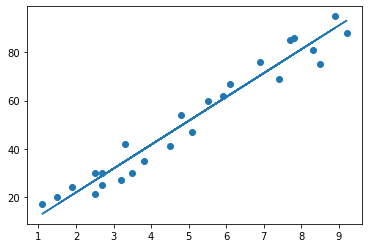

In [24]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

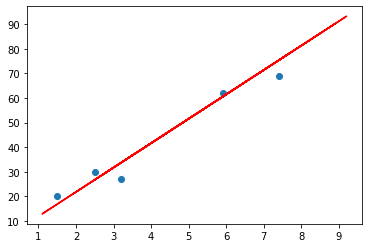

In [25]:
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="red")

# Solution

In [27]:
import joblib
joblib.dump(regressor,"Student_Mark_Predictor.pkl")

['Student_Mark_Predictor.pkl']

In [28]:
model = joblib.load("Student_Mark_Predictor.pkl")

In [30]:
model.predict([[8]])

array([81.30341189])